In [34]:
import numpy as np
import random
from numpy import inf
from copy import deepcopy
import time
from IPython.display import clear_output
import matplotlib
import matplotlib.pyplot as plot
from statistics import mean
from numpy import average

move_dict = {
  "A": 0, "a": 0,
  "B": 1, "b": 1,
  "C": 2, "c": 2,
  "D": 3, "d": 3,
  "E": 4, "e": 4,
}

class Teeko:
    def __init__(self, player1, player2):
        self.player1 = (player1, 1)  # Black Player
        self.player2 = (player2, 2)  # Red Player
        self.board = np.zeros((5,5))
        self.turn = 0
        self.current_player = self.player1
    
    def set_player(self, player):
        if player == 1:
            self.current_player = self.player1
        else: self.current_player = self.player2
    
    def switch_player(self):
        if self.current_player == self.player1:
            self.current_player = self.player2
        else: self.current_player = self.player1
        self.turn += 1
        
    def move_translator(self, selected):       #A5, B6 etc.
        yPos = selected[0]
        xPos = int(selected[1]) - 1
        return (move_dict[yPos], xPos)

    def make_a_move(self, selected, move = None):       # selected recibe posiciones reales tupla, move recibe la dirección  # move
        y, x = selected
        valid_move = True
        if self.board[y][x] != self.current_player[1] and move != None:
            valid_move = False
            return valid_move, selected
        if move is not None:
            for pos in move:
                if pos == "u" and y > 0:
                    y -= 1
                elif pos == "d" and y < 4:
                    y += 1
                elif pos == "r" and x < 4:
                    x += 1 
                elif pos == "l" and x > 0: 
                    x -= 1
                else: 
                    valid_move = False
        if valid_move and self.board[y][x] == 0:
            self.board[selected[0]][selected[1]] = 0
            limit = x >=0 and x < 5 and y >= 0 and y < 5
            if limit:
                selected = (y, x)
                self.board[selected[0]][selected[1]] = self.current_player[1]
            else: 
                print("Limites superados o posición ocupada")
                valid_move = False
        else: 
            print("Movimiento no válido, vuelva a intentarlo")   
            valid_move = False
            
        return valid_move, selected
        
    def check_horizontal(self, y):
        winner = False
        count = 0
        for row in self.board[y]:
            if row == self.current_player[1]:
                count += 1
            else: count = 0
            if count == 4:
                winner = True
        return winner

    def check_vertical(self, x):
        winner = False
        count = 0
        for col in range(5):
            if self.board[col][x] == self.current_player[1]:
                count += 1
            else: count = 0
            if count == 4:
                winner = True
        return winner
    
    def check_diagonal(self, matrix):
        winner = False
        count = 0
        for k in range(3):
            arr = np.diag(matrix, k - 1)
            for x in arr:
                if x == self.current_player[1]:
                    count += 1
                else: count = 0
                if count == 4:
                    winner = True
            if winner:
                break
        return winner
    
    def check_square(self, x, y):
        winner = False
        count = 0
        for i in range (2):
            if y + 1 < 5 and x + i < 5:
                if self.board[y][x + i] == self.current_player[1]:
                    count += 1
                if self.board[y + 1][x + i] == self.current_player[1]:
                    count += 1
        if count != 4:
            count = 0
            for i in range (2):
                if y - 1 >= 0 and x + i < 5:
                    if self.board[y][x + i] == self.current_player[1]:
                        count += 1
                    if self.board[y - 1][x + i] == self.current_player[1]:
                        count += 1
        if count != 4:
            count = 0
            for i in range (2):
                if y + 1 < 5 and x - i >= 0:
                    if self.board[y][x - i] == self.current_player[1]:
                        count += 1
                    if self.board[y + 1][x - i] == self.current_player[1]:
                        count += 1
        if count != 4:
            count = 0
            for i in range (2):
                if y - 1 >= 0 and x - i >= 0:
                    if self.board[y][x - i] == self.current_player[1]:
                        count += 1
                    if self.board[y - 1][x - i] == self.current_player[1]:
                        count += 1
        if count == 4:
            winner = True
        return winner

    def check_winner(self, last_position): #0,1 2,0
        y, x = last_position
        count = 0
        winner = False
        winner = self.check_horizontal(y)
        if not winner:
            winner = self.check_vertical(x)
        if not winner:
            winner = self.check_diagonal(self.board)
        if not winner:
            winner = self.check_diagonal(np.fliplr(self.board))
        if not winner:
            winner = self.check_square(x, y)
        return winner  
    
    def get_position(self):
        arr_pos = []
        phase1 = False
        if np.count_nonzero(self.board > 0) != 8:
            phase1 = True
        for y in range(5):
            for x in range(5):
                if phase1:
                    if self.board[y][x] == 0:
                        arr_pos.append((y,x))
                else:
                    if self.board[y][x] == self.current_player[1]:
                        arr_pos.append((y,x))
        return arr_pos
    
    def get_actions(self, selected):
        y, x = selected
        actions = ['u', 'd', 'l', 'r', 'ul', 'ur', 'dl', 'dr']
        valid_move = True
        valid_actions = []
        if np.count_nonzero(self.board > 0) != 8:
            return [None]
        for action in actions:
            valid_move = True
            y, x = selected
            for pos in action:
                if pos == "u" and y > 0:
                    y -= 1
                elif pos == "d" and y < 4:
                    y += 1
                elif pos == "r" and x < 4:
                    x += 1 
                elif pos == "l" and x > 0: 
                    x -= 1
                else: 
                    valid_move = False
            if valid_move and self.board[y][x] == 0:
                valid_actions.append(action)
        return valid_actions
    
    def heuristic(self, position):
        strength = 0
        mat = [[4,6,5,6,4],[6,10,10,10,6],[5,10,12,10,5],[6,10,10,10,6],[4,6,5,6,4]]
        
        for y in range(5):
            for x in range(5):
                if self.board[y][x] == self.player1[1]:
                    strength += mat[y][x]
                if self.board[y][x] == self.player2[1]:
                    strength -= mat[y][x]
        if self.current_player[0] == "MAX":
            strength -= self.turn * 2
        if self.current_player[0] == "MIN":
            strength += self.turn * 2
        if self.check_winner(position):
            if self.current_player[0] == "MAX":
                strength += 100
            if self.current_player[0] == "MIN":
                strength -= 100
        return strength

In [49]:
#Minimax with depth Algorithm (w/o Alpha Beta Pruning)

max_depth = 3

def min_max_with_depth_no_ABP(game):  #player MIN MAX, game es de la clase Teeko
    values = []
    expanded = [0]
    i = 0
    mark_position = game.get_position() # el get devuelve un array de tuplas de las posiciones de todas las fichas del current_player 
    actions = []
    moves = []
    pieces = []
    if game.current_player[0] == "MAX":
        for mark in mark_position:
            actions = game.get_actions(mark)
            for action in actions:
                copyGame = deepcopy(game)
                b, selected = copyGame.make_a_move(mark, action)
                value = min_value_with_depth_no_ABP(copyGame, selected, 0, expanded)
                values.append(value) 
                moves.append(action)
                pieces.append(mark)
        i = np.argmax(values)
    else:
        for mark in mark_position:
            actions = game.get_actions(mark)
            for action in actions:
                copyGame = deepcopy(game)
                b, selected = copyGame.make_a_move(mark, action)
                value = max_value_with_depth_no_ABP(copyGame, selected, 0, expanded)
                values.append(value) 
                moves.append(action)
                pieces.append(mark)
        i = np.argmin(values)
    return moves[i], pieces[i], expanded[0]

def min_value_with_depth_no_ABP(game, last_position, depth, expanded):    
    expanded[0] += 1
    actions = []
    v = inf
    if cut_off(game, last_position, depth):
        v = game.heuristic(last_position)
        game.switch_player()
        return v
    else: 
        game.switch_player()
        mark_position = game.get_position() # el get devuelve un array de tuplas de las posiciones de todas las fichas del current_player 
        for mark in mark_position:
            actions = game.get_actions(mark)
            for action in actions:
                copyGame = deepcopy(game)
                b, selected = copyGame.make_a_move(mark, action)
                v = min(v, max_value_with_depth_no_ABP(copyGame, selected, depth + 1,expanded))
    game.switch_player()
    return v

def max_value_with_depth_no_ABP(game, last_position, depth, expanded):
    expanded[0] += 1
    actions = []
    v = -inf
    if cut_off(game, last_position, depth):
        v = game.heuristic(last_position)
        game.switch_player()
        return v
    else: 
        game.switch_player()
        mark_position = game.get_position() # el get devuelve un array de tuplas de las posiciones de todas las fichas del current_player 
        for mark in mark_position:
            actions = game.get_actions(mark)
            for action in actions:
                copyGame = deepcopy(game)
                b, selected = copyGame.make_a_move(mark, action)
                v = max(v, min_value_with_depth_no_ABP(copyGame, selected, depth + 1, expanded)) 
    game.switch_player()
    return v

def cut_off(game, last_position, depth):
    return depth == max_depth or game.check_winner(last_position)

In [51]:
#Minimax with depth Algorithm (w/ Alpha Beta Pruning)


max_depth = 3

def min_max_with_depth(game):  #player MIN MAX, game es de la clase Teeko
    values = []
    i = 0
    expanded = [0]
    mark_position = game.get_position() # el get devuelve un array de tuplas de las posiciones de todas las fichas del current_player 
    actions = []
    moves = []
    pieces = []
    if game.current_player[0] == "MAX":
        for mark in mark_position:
            actions = game.get_actions(mark)
            for action in actions:
                copyGame = deepcopy(game)
                b, selected = copyGame.make_a_move(mark, action)
                value = min_value_with_depth(copyGame, selected,-inf, inf, 0, expanded)
                values.append(value) 
                moves.append(action)
                pieces.append(mark)
        i = np.argmax(values)
    else:
        for mark in mark_position:
            actions = game.get_actions(mark)
            for action in actions:
                copyGame = deepcopy(game)
                b, selected = copyGame.make_a_move(mark, action)
                value = max_value_with_depth(copyGame, selected,-inf, inf, 0, expanded)
                values.append(value) 
                moves.append(action)
                pieces.append(mark)
        i = np.argmin(values)
    return moves[i], pieces[i], expanded[0]

def min_value_with_depth(game, last_position, alpha, beta, depth, expanded):    
    expanded[0] += 1
    actions = []
    v = inf
    if cut_off(game, last_position, depth):
        v = game.heuristic(last_position)
        game.switch_player()
        return v
    else: 
        game.switch_player()
        mark_position = game.get_position() # el get devuelve un array de tuplas de las posiciones de todas las fichas del current_player 
        for mark in mark_position:
            actions = game.get_actions(mark)
            for action in actions:
                copyGame = deepcopy(game)
                b, selected = copyGame.make_a_move(mark, action)
                v = min(v, max_value_with_depth(copyGame, selected,alpha, beta, depth + 1, expanded))
                if v <= alpha:
                    return v
                beta = min(beta,v)
    game.switch_player()
    return v

def max_value_with_depth(game, last_position, alpha, beta, depth,expanded):
    expanded[0] += 1
    actions = []
    v = -inf
    if cut_off(game, last_position, depth):
        v = game.heuristic(last_position)
        game.switch_player()
        return v
    else: 
        game.switch_player()
        mark_position = game.get_position() # el get devuelve un array de tuplas de las posiciones de todas las fichas del current_player 
        for mark in mark_position:
            actions = game.get_actions(mark)
            for action in actions:
                copyGame = deepcopy(game)
                b, selected = copyGame.make_a_move(mark, action)
                v = max(v, min_value_with_depth(copyGame, selected,alpha, beta, depth + 1, expanded)) 
                if v >= beta:
                    return v
                alpha = max(alpha,v)
    game.switch_player()
    return v

def cut_off(game, last_position, depth):
    return depth == max_depth or game.check_winner(last_position)

In [53]:
#Minimax with depth Algorithm (w/ Alpha Beta Pruning and shuffle)

max_depth = 3

def min_max_with_depth_shuffle(game):  #player MIN MAX, game es de la clase Teeko
    values = []
    expanded = [0]
    i = 0
    mark_position = game.get_position() # el get devuelve un array de tuplas de las posiciones de todas las fichas del current_player 
    actions = []
    moves = []
    pieces = []
    random.shuffle(mark_position)
    if game.current_player[0] == "MAX":
        for mark in mark_position:
            actions = game.get_actions(mark)
            random.shuffle(actions)
            for action in actions:
                copyGame = deepcopy(game)
                b, selected = copyGame.make_a_move(mark, action)
                value = min_value_with_depth_shuffle(copyGame, selected,-inf, inf, 0, expanded)
                values.append(value) 
                moves.append(action)
                pieces.append(mark)
        i = np.argmax(values)
    else:
        for mark in mark_position:
            actions = game.get_actions(mark)
            for action in actions:
                copyGame = deepcopy(game)
                b, selected = copyGame.make_a_move(mark, action)
                value = max_value_with_depth_shuffle(copyGame, selected,-inf, inf, 0, expanded)
                values.append(value) 
                moves.append(action)
                pieces.append(mark)
        i = np.argmin(values)
    return moves[i], pieces[i], expanded[0]

def min_value_with_depth_shuffle(game, last_position, alpha, beta, depth, expanded):    
    expanded[0] += 1
    actions = []
    v = inf
    if cut_off(game, last_position, depth):
        v = game.heuristic(last_position)
        game.switch_player()
        return v
    else: 
        game.switch_player()
        mark_position = game.get_position() # el get devuelve un array de tuplas de las posiciones de todas las fichas del current_player 
        random.shuffle(mark_position)
        for mark in mark_position:
            actions = game.get_actions(mark)
            random.shuffle(actions)
            for action in actions:
                copyGame = deepcopy(game)
                b, selected = copyGame.make_a_move(mark, action)
                v = min(v, max_value_with_depth_shuffle(copyGame, selected,alpha, beta, depth + 1, expanded))
                if v <= alpha:
                    return v
                beta = min(beta,v)
    game.switch_player()
    return v

def max_value_with_depth_shuffle(game, last_position, alpha, beta, depth, expanded):
    actions = []
    expanded[0] += 1
    v = -inf
    if cut_off(game, last_position, depth):
        v = game.heuristic(last_position)
        game.switch_player()
        return v
    else: 
        game.switch_player()
        mark_position = game.get_position() # el get devuelve un array de tuplas de las posiciones de todas las fichas del current_player 
        random.shuffle(mark_position)
        for mark in mark_position:
            actions = game.get_actions(mark)
            random.shuffle(actions)
            for action in actions:
                copyGame = deepcopy(game)
                b, selected = copyGame.make_a_move(mark, action)
                v = max(v, min_value_with_depth_shuffle(copyGame, selected,alpha, beta, depth + 1, expanded)) 
                if v >= beta:
                    return v
                alpha = max(alpha,v)
    game.switch_player()
    return v

def cut_off(game, last_position, depth):
    return depth == max_depth or game.check_winner(last_position)

# PRUEBAS
## Test 1 Min Max With Depth (ABP)

Primer Jugador:  ('MAX', 1)
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]]
(None, (2, 2))
[3.9806735515594482] turn time
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 2. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]]
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 1. 2. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]]
(None, (1, 1))
[3.9806735515594482, 2.0625319480895996] turn time
[[0. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0.]
 [0. 1. 2. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]]
[[0. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0.]
 [0. 1. 2. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]]
(None, (3, 1))
[3.9806735515594482, 2.0625319480895996, 2.2931978702545166] turn time
[[0. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0.]
 [0. 1. 2. 0. 0.]
 [0. 2. 0. 1. 0.]
 [0. 0. 1. 0. 0.]]
[[0. 0. 0. 0. 0.]
 [1. 2. 0. 0. 0.]
 [0. 1. 2. 0. 0.]
 [0. 2. 0. 1. 0.]
 [0. 0. 1. 0. 0.]]
(None, (3, 2))
[3.9806735515594482, 2.0625319480895996, 2.2931978702545166, 1.2834837436676025] turn time
[[0. 0. 0. 0. 0.]
 [1. 2. 0. 0.

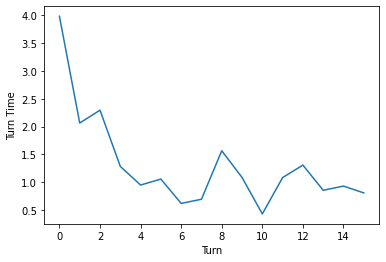

In [14]:
test_1_min_max = Teeko("MAX", "MIN")
turn_time11 = []

print("Primer Jugador: ", test_1_min_max.current_player)
test_1_min_max.make_a_move((4,2))   #human move
test_1_min_max.switch_player()
print(test_1_min_max.board)
start = time.time()        
print(min_max_with_depth(deepcopy(test_1_min_max)))
end = time.time()
turn_time11.append(end - start)
print(turn_time11, "turn time")

test_1_min_max.make_a_move((2,2)) #computer move
test_1_min_max.switch_player()
print(test_1_min_max.board)

test_1_min_max.make_a_move((2,1)) #human move
test_1_min_max.switch_player()
print(test_1_min_max.board)
start = time.time()        
print(min_max_with_depth(deepcopy(test_1_min_max)))
end = time.time()
turn_time11.append(end - start)
print(turn_time11, "turn time")

test_1_min_max.make_a_move((1,1)) #computer move
test_1_min_max.switch_player()
print(test_1_min_max.board)

test_1_min_max.make_a_move((3,3)) #human move
test_1_min_max.switch_player()
print(test_1_min_max.board)
start = time.time()        
print(min_max_with_depth(deepcopy(test_1_min_max)))
end = time.time()
turn_time11.append(end - start)
print(turn_time11, "turn time")

test_1_min_max.make_a_move((3,1)) #computer move
test_1_min_max.switch_player()
print(test_1_min_max.board)

test_1_min_max.make_a_move((1,0)) #human move
test_1_min_max.switch_player()
print(test_1_min_max.board)
start = time.time()        
print(min_max_with_depth(deepcopy(test_1_min_max)))
end = time.time()
turn_time11.append(end - start)
print(turn_time11, "turn time")

test_1_min_max.make_a_move((3,2)) #computer move
test_1_min_max.switch_player()
print(test_1_min_max.board)

test_1_min_max.make_a_move((3,3), "u") #human move
test_1_min_max.switch_player()
print(test_1_min_max.board)
start = time.time()        
print(min_max_with_depth(deepcopy(test_1_min_max)))
end = time.time()
turn_time11.append(end - start)
print(turn_time11, "turn time")

test_1_min_max.make_a_move((1,1), "r") #computer move
test_1_min_max.switch_player()
print(test_1_min_max.board)

test_1_min_max.make_a_move((1,0), "r") #human move
test_1_min_max.switch_player()
print(test_1_min_max.board)
start = time.time()        
print(min_max_with_depth(deepcopy(test_1_min_max)))
end = time.time()
turn_time11.append(end - start)
print(turn_time11, "turn time")

test_1_min_max.make_a_move((1,2), "u") #computer move
test_1_min_max.switch_player()
print(test_1_min_max.board)

test_1_min_max.make_a_move((2,3), "ul") #human move
test_1_min_max.switch_player()
print(test_1_min_max.board)
start = time.time()        
print(min_max_with_depth(deepcopy(test_1_min_max)))
end = time.time()
turn_time11.append(end - start)
print(turn_time11, "turn time")

test_1_min_max.make_a_move((0,2), "r") #computer move
test_1_min_max.switch_player()
print(test_1_min_max.board)

test_1_min_max.make_a_move((4,2), "ur") #human move
test_1_min_max.switch_player()
print(test_1_min_max.board)
start = time.time()        
print(min_max_with_depth(deepcopy(test_1_min_max)))
end = time.time()
turn_time11.append(end - start)
print(turn_time11, "turn time")

test_1_min_max.make_a_move((3,2), "dl") #computer move
test_1_min_max.switch_player()
print(test_1_min_max.board)

test_1_min_max.make_a_move((1,2), "r") #human move
test_1_min_max.switch_player()
print(test_1_min_max.board)
start = time.time()        
print(min_max_with_depth(deepcopy(test_1_min_max)))
end = time.time()
turn_time11.append(end - start)
print(turn_time11, "turn time")

test_1_min_max.make_a_move((4,1), "l") #computer move
test_1_min_max.switch_player()
print(test_1_min_max.board)

test_1_min_max.make_a_move((3,3), "u") #human move
test_1_min_max.switch_player()
print(test_1_min_max.board)
start = time.time()        
print(min_max_with_depth(deepcopy(test_1_min_max)))
end = time.time()
turn_time11.append(end - start)
print(turn_time11, "turn time")

test_1_min_max.make_a_move((2,2), "u") #computer move
test_1_min_max.switch_player()
print(test_1_min_max.board)

test_1_min_max.make_a_move((1,3), "dl") #human move
test_1_min_max.switch_player()
print(test_1_min_max.board)
start = time.time()        
print(min_max_with_depth(deepcopy(test_1_min_max)))
end = time.time()
turn_time11.append(end - start)
print(turn_time11, "turn time")

test_1_min_max.make_a_move((3,1), "ul") #computer move
test_1_min_max.switch_player()
print(test_1_min_max.board)

test_1_min_max.make_a_move((2,1), "dr") #human move
test_1_min_max.switch_player()
print(test_1_min_max.board)
start = time.time()        
print(min_max_with_depth(deepcopy(test_1_min_max)))
end = time.time()
turn_time11.append(end - start)
print(turn_time11, "turn time")

test_1_min_max.make_a_move((4,0), "ur") #computer move
test_1_min_max.switch_player()
print(test_1_min_max.board)

test_1_min_max.make_a_move((2,3), "dr") #human move
test_1_min_max.switch_player()
print(test_1_min_max.board)
start = time.time()        
print(min_max_with_depth(deepcopy(test_1_min_max)))
end = time.time()
turn_time11.append(end - start)
print(turn_time11, "turn time")

test_1_min_max.make_a_move((2,0), "d") #computer move
test_1_min_max.switch_player()
print(test_1_min_max.board)

test_1_min_max.make_a_move((1,1), "d") #human move
test_1_min_max.switch_player()
print(test_1_min_max.board)
start = time.time()        
print(min_max_with_depth(deepcopy(test_1_min_max)))
end = time.time()
turn_time11.append(end - start)
print(turn_time11, "turn time")

test_1_min_max.make_a_move((1,2), "dr") #computer move
test_1_min_max.switch_player()
print(test_1_min_max.board)

test_1_min_max.make_a_move((3,2), "r") #human move
test_1_min_max.switch_player()
print(test_1_min_max.board)
start = time.time()        
print(min_max_with_depth(deepcopy(test_1_min_max)))
end = time.time()
turn_time11.append(end - start)
print(turn_time11, "turn time")

test_1_min_max.make_a_move((3,0), "d") #computer move
test_1_min_max.switch_player()
print(test_1_min_max.board)

test_1_min_max.make_a_move((2,1), "u") #human move
test_1_min_max.switch_player()
print(test_1_min_max.board)
start = time.time()        
print(min_max_with_depth(deepcopy(test_1_min_max)))
end = time.time()
turn_time11.append(end - start)
print(turn_time11, "turn time")

test_1_min_max.make_a_move((2,3), "ul") #computer move
test_1_min_max.switch_player()
print(test_1_min_max.board)

test_1_min_max.make_a_move((3,4), "d") #human move  --------------------------------HUMAN WINS-----------------------------------------------------
test_1_min_max.switch_player()
print(test_1_min_max.board)


plot.plot(range(16), turn_time11)
plot.xlabel('Turn')
plot.ylabel('Turn Time')
plot.title('')
  
plot.show()

## Test 1 Min Max With Depth (w/o ABP)

In [15]:
test_1_no_abp = Teeko("MAX", "MIN")
turn_time12 = []

print("Primer Jugador: ", test_1_no_abp.current_player)
test_1_no_abp.make_a_move((4,2))   #human move
test_1_no_abp.switch_player()
print(test_1_no_abp.board)
start = time.time()        
print(min_max_with_depth_no_ABP(deepcopy(test_1_no_abp)))
end = time.time()
turn_time12.append(end - start)
print(turn_time12, "turn time")

test_1_no_abp.make_a_move((2,2)) #computer move
test_1_no_abp.switch_player()
print(test_1_no_abp.board)

test_1_no_abp.make_a_move((2,1)) #human move
test_1_no_abp.switch_player()
print(test_1_no_abp.board)
start = time.time()        
print(min_max_with_depth_no_ABP(deepcopy(test_1_no_abp)))
end = time.time()
turn_time12.append(end - start)
print(turn_time12, "turn time")

test_1_no_abp.make_a_move((1,1)) #computer move
test_1_no_abp.switch_player()
print(test_1_no_abp.board)

test_1_no_abp.make_a_move((3,3)) #human move
test_1_no_abp.switch_player()
print(test_1_no_abp.board)
start = time.time()        
print(min_max_with_depth_no_ABP(deepcopy(test_1_no_abp)))
end = time.time()
turn_time12.append(end - start)
print(turn_time12, "turn time")

test_1_no_abp.make_a_move((3,1)) #computer move
test_1_no_abp.switch_player()
print(test_1_no_abp.board)

test_1_no_abp.make_a_move((1,0)) #human move
test_1_no_abp.switch_player()
print(test_1_no_abp.board)
start = time.time()        
print(min_max_with_depth_no_ABP(deepcopy(test_1_no_abp)))
end = time.time()
turn_time12.append(end - start)
print(turn_time12, "turn time")

test_1_no_abp.make_a_move((3,2)) #computer move
test_1_no_abp.switch_player()
print(test_1_no_abp.board)

test_1_no_abp.make_a_move((3,3), "u") #human move
test_1_no_abp.switch_player()
print(test_1_no_abp.board)
start = time.time()        
print(min_max_with_depth_no_ABP(deepcopy(test_1_no_abp)))
end = time.time()
turn_time12.append(end - start)
print(turn_time12, "turn time")

test_1_no_abp.make_a_move((1,1), "r") #computer move
test_1_no_abp.switch_player()
print(test_1_no_abp.board)

test_1_no_abp.make_a_move((1,0), "r") #human move
test_1_no_abp.switch_player()
print(test_1_no_abp.board)
start = time.time()        
print(min_max_with_depth_no_ABP(deepcopy(test_1_no_abp)))
end = time.time()
turn_time12.append(end - start)
print(turn_time12, "turn time")


test_1_no_abp.make_a_move((1,2), "u") #computer move
test_1_no_abp.switch_player()
print(test_1_no_abp.board)

test_1_no_abp.make_a_move((2,3), "ul") #human move
test_1_no_abp.switch_player()
print(test_1_no_abp.board)
start = time.time()        
print(min_max_with_depth_no_ABP(deepcopy(test_1_no_abp)))
end = time.time()
turn_time12.append(end - start)
print(turn_time12, "turn time")

test_1_no_abp.make_a_move((0,2), "r") #computer move
test_1_no_abp.switch_player()
print(test_1_no_abp.board)

test_1_no_abp.make_a_move((4,2), "ur") #human move
test_1_no_abp.switch_player()
print(test_1_no_abp.board)
start = time.time()        
print(min_max_with_depth_no_ABP(deepcopy(test_1_no_abp)))
end = time.time()
turn_time12.append(end - start)
print(turn_time12, "turn time")

test_1_no_abp.make_a_move((3,2), "dl") #computer move
test_1_no_abp.switch_player()
print(test_1_no_abp.board)

test_1_no_abp.make_a_move((1,2), "r") #human move
test_1_no_abp.switch_player()
print(test_1_no_abp.board)
start = time.time()        
print(min_max_with_depth_no_ABP(deepcopy(test_1_no_abp)))
end = time.time()
turn_time12.append(end - start)
print(turn_time12, "turn time")

test_1_no_abp.make_a_move((4,1), "l") #computer move
test_1_no_abp.switch_player()
print(test_1_no_abp.board)

test_1_no_abp.make_a_move((3,3), "u") #human move
test_1_no_abp.switch_player()
print(test_1_no_abp.board)
start = time.time()        
print(min_max_with_depth_no_ABP(deepcopy(test_1_no_abp)))
end = time.time()
turn_time12.append(end - start)
print(turn_time12, "turn time")

test_1_no_abp.make_a_move((2,2), "u") #computer move
test_1_no_abp.switch_player()
print(test_1_no_abp.board)

test_1_no_abp.make_a_move((1,3), "dl") #human move
test_1_no_abp.switch_player()
print(test_1_no_abp.board)
start = time.time()        
print(min_max_with_depth_no_ABP(deepcopy(test_1_no_abp)))
end = time.time()
turn_time12.append(end - start)
print(turn_time12, "turn time")

test_1_no_abp.make_a_move((3,1), "ul") #computer move
test_1_no_abp.switch_player()
print(test_1_no_abp.board)

test_1_no_abp.make_a_move((2,1), "dr") #human move
test_1_no_abp.switch_player()
print(test_1_no_abp.board)
start = time.time()        
print(min_max_with_depth_no_ABP(deepcopy(test_1_no_abp)))
end = time.time()
turn_time12.append(end - start)
print(turn_time12, "turn time")

test_1_no_abp.make_a_move((4,0), "ur") #computer move
test_1_no_abp.switch_player()
print(test_1_no_abp.board)

test_1_no_abp.make_a_move((2,3), "dr") #human move
test_1_no_abp.switch_player()
print(test_1_no_abp.board)
start = time.time()        
print(min_max_with_depth_no_ABP(deepcopy(test_1_no_abp)))
end = time.time()
turn_time12.append(end - start)
print(turn_time12, "turn time")

test_1_no_abp.make_a_move((2,0), "d") #computer move
test_1_no_abp.switch_player()
print(test_1_no_abp.board)

test_1_no_abp.make_a_move((1,1), "d") #human move
test_1_no_abp.switch_player()
print(test_1_no_abp.board)
start = time.time()        
print(min_max_with_depth_no_ABP(deepcopy(test_1_no_abp)))
end = time.time()
turn_time12.append(end - start)
print(turn_time12, "turn time")

test_1_no_abp.make_a_move((1,2), "dr") #computer move
test_1_no_abp.switch_player()
print(test_1_no_abp.board)

test_1_no_abp.make_a_move((3,2), "r") #human move
test_1_no_abp.switch_player()
print(test_1_no_abp.board)
start = time.time()        
print(min_max_with_depth_no_ABP(deepcopy(test_1_no_abp)))
end = time.time()
turn_time12.append(end - start)
print(turn_time12, "turn time")

test_1_no_abp.make_a_move((3,0), "d") #computer move
test_1_no_abp.switch_player()
print(test_1_no_abp.board)

test_1_no_abp.make_a_move((2,1), "u") #human move
test_1_no_abp.switch_player()
print(test_1_no_abp.board)
start = time.time()        
print(min_max_with_depth_no_ABP(deepcopy(test_1_no_abp)))
end = time.time()
turn_time12.append(end - start)
print(turn_time12, "turn time")

test_1_no_abp.make_a_move((2,3), "ul") #computer move
test_1_no_abp.switch_player()
print(test_1_no_abp.board)

test_1_no_abp.make_a_move((3,4), "d") #human move  --------------------------------HUMAN WINS-----------------------------------------------------
test_1_no_abp.switch_player()
print(test_1_no_abp.board)


Primer Jugador:  ('MAX', 1)
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]]
(None, (2, 2))
[16.602823734283447] turn time
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 2. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]]
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 1. 2. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]]
(None, (1, 1))
[16.602823734283447, 11.6298086643219] turn time
[[0. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0.]
 [0. 1. 2. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]]
[[0. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0.]
 [0. 1. 2. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]]
(None, (3, 1))
[16.602823734283447, 11.6298086643219, 8.080036163330078] turn time
[[0. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0.]
 [0. 1. 2. 0. 0.]
 [0. 2. 0. 1. 0.]
 [0. 0. 1. 0. 0.]]
[[0. 0. 0. 0. 0.]
 [1. 2. 0. 0. 0.]
 [0. 1. 2. 0. 0.]
 [0. 2. 0. 1. 0.]
 [0. 0. 1. 0. 0.]]
(None, (3, 2))
[16.602823734283447, 11.6298086643219, 8.080036163330078, 5.114847660064697] turn time
[[0. 0. 0. 0. 0.]
 [1. 2. 0. 0. 0.]
 [0.

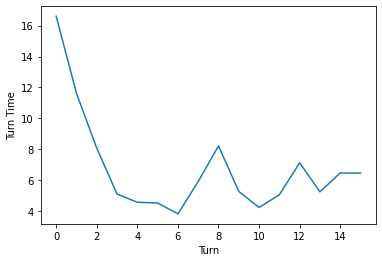

In [16]:

plot.plot(range(16), turn_time12)
plot.xlabel('Turn')
plot.ylabel('Turn Time')
plot.title('')
  
plot.show()

## Test 1 Min Max With Depth (ABP and Shuffle)

In [12]:
test_1_no_abp = Teeko("MAX", "MIN")
turn_time13 = []

print("Primer Jugador: ", test_1_no_abp.current_player)
test_1_no_abp.make_a_move((4,2))   #human move
test_1_no_abp.switch_player()
print(test_1_no_abp.board)
start = time.time()        
print(min_max_with_depth_shuffle(deepcopy(test_1_no_abp)))
end = time.time()
turn_time13.append(end - start)
print(turn_time13, "turn time")

test_1_no_abp.make_a_move((2,2)) #computer move
test_1_no_abp.switch_player()
print(test_1_no_abp.board)

test_1_no_abp.make_a_move((2,1)) #human move
test_1_no_abp.switch_player()
print(test_1_no_abp.board)
start = time.time()        
print(min_max_with_depth_shuffle(deepcopy(test_1_no_abp)))
end = time.time()
turn_time13.append(end - start)
print(turn_time13, "turn time")

test_1_no_abp.make_a_move((1,1)) #computer move
test_1_no_abp.switch_player()
print(test_1_no_abp.board)

test_1_no_abp.make_a_move((3,3)) #human move
test_1_no_abp.switch_player()
print(test_1_no_abp.board)
start = time.time()        
print(min_max_with_depth_shuffle(deepcopy(test_1_no_abp)))
end = time.time()
turn_time13.append(end - start)
print(turn_time13, "turn time")

test_1_no_abp.make_a_move((3,1)) #computer move
test_1_no_abp.switch_player()
print(test_1_no_abp.board)

test_1_no_abp.make_a_move((1,0)) #human move
test_1_no_abp.switch_player()
print(test_1_no_abp.board)
start = time.time()        
print(min_max_with_depth_shuffle(deepcopy(test_1_no_abp)))
end = time.time()
turn_time13.append(end - start)
print(turn_time13, "turn time")

test_1_no_abp.make_a_move((3,2)) #computer move
test_1_no_abp.switch_player()
print(test_1_no_abp.board)

test_1_no_abp.make_a_move((3,3), "u") #human move
test_1_no_abp.switch_player()
print(test_1_no_abp.board)
start = time.time()        
print(min_max_with_depth_shuffle(deepcopy(test_1_no_abp)))
end = time.time()
turn_time13.append(end - start)
print(turn_time13, "turn time")

test_1_no_abp.make_a_move((1,1), "r") #computer move
test_1_no_abp.switch_player()
print(test_1_no_abp.board)

test_1_no_abp.make_a_move((1,0), "r") #human move
test_1_no_abp.switch_player()
print(test_1_no_abp.board)
start = time.time()        
print(min_max_with_depth_shuffle(deepcopy(test_1_no_abp)))
end = time.time()
turn_time13.append(end - start)
print(turn_time13, "turn time")


test_1_no_abp.make_a_move((1,2), "u") #computer move
test_1_no_abp.switch_player()
print(test_1_no_abp.board)

test_1_no_abp.make_a_move((2,3), "ul") #human move
test_1_no_abp.switch_player()
print(test_1_no_abp.board)
start = time.time()        
print(min_max_with_depth_shuffle(deepcopy(test_1_no_abp)))
end = time.time()
turn_time13.append(end - start)
print(turn_time13, "turn time")

test_1_no_abp.make_a_move((0,2), "r") #computer move
test_1_no_abp.switch_player()
print(test_1_no_abp.board)

test_1_no_abp.make_a_move((4,2), "ur") #human move
test_1_no_abp.switch_player()
print(test_1_no_abp.board)
start = time.time()        
print(min_max_with_depth_shuffle(deepcopy(test_1_no_abp)))
end = time.time()
turn_time13.append(end - start)
print(turn_time13, "turn time")

test_1_no_abp.make_a_move((3,2), "dl") #computer move
test_1_no_abp.switch_player()
print(test_1_no_abp.board)

test_1_no_abp.make_a_move((1,2), "r") #human move
test_1_no_abp.switch_player()
print(test_1_no_abp.board)
start = time.time()        
print(min_max_with_depth_shuffle(deepcopy(test_1_no_abp)))
end = time.time()
turn_time13.append(end - start)
print(turn_time13, "turn time")

test_1_no_abp.make_a_move((4,1), "l") #computer move
test_1_no_abp.switch_player()
print(test_1_no_abp.board)

test_1_no_abp.make_a_move((3,3), "u") #human move
test_1_no_abp.switch_player()
print(test_1_no_abp.board)
start = time.time()        
print(min_max_with_depth_shuffle(deepcopy(test_1_no_abp)))
end = time.time()
turn_time13.append(end - start)
print(turn_time13, "turn time")

test_1_no_abp.make_a_move((2,2), "u") #computer move
test_1_no_abp.switch_player()
print(test_1_no_abp.board)

test_1_no_abp.make_a_move((1,3), "dl") #human move
test_1_no_abp.switch_player()
print(test_1_no_abp.board)
start = time.time()        
print(min_max_with_depth_shuffle(deepcopy(test_1_no_abp)))
end = time.time()
turn_time13.append(end - start)
print(turn_time13, "turn time")

test_1_no_abp.make_a_move((3,1), "ul") #computer move
test_1_no_abp.switch_player()
print(test_1_no_abp.board)

test_1_no_abp.make_a_move((2,1), "dr") #human move
test_1_no_abp.switch_player()
print(test_1_no_abp.board)
start = time.time()        
print(min_max_with_depth_shuffle(deepcopy(test_1_no_abp)))
end = time.time()
turn_time13.append(end - start)
print(turn_time13, "turn time")

test_1_no_abp.make_a_move((4,0), "ur") #computer move
test_1_no_abp.switch_player()
print(test_1_no_abp.board)

test_1_no_abp.make_a_move((2,3), "dr") #human move
test_1_no_abp.switch_player()
print(test_1_no_abp.board)
start = time.time()        
print(min_max_with_depth_shuffle(deepcopy(test_1_no_abp)))
end = time.time()
turn_time13.append(end - start)
print(turn_time13, "turn time")

test_1_no_abp.make_a_move((2,0), "d") #computer move
test_1_no_abp.switch_player()
print(test_1_no_abp.board)

test_1_no_abp.make_a_move((1,1), "d") #human move
test_1_no_abp.switch_player()
print(test_1_no_abp.board)
start = time.time()        
print(min_max_with_depth_shuffle(deepcopy(test_1_no_abp)))
end = time.time()
turn_time13.append(end - start)
print(turn_time13, "turn time")

test_1_no_abp.make_a_move((1,2), "dr") #computer move
test_1_no_abp.switch_player()
print(test_1_no_abp.board)

test_1_no_abp.make_a_move((3,2), "r") #human move
test_1_no_abp.switch_player()
print(test_1_no_abp.board)
start = time.time()        
print(min_max_with_depth_shuffle(deepcopy(test_1_no_abp)))
end = time.time()
turn_time13.append(end - start)
print(turn_time13, "turn time")

test_1_no_abp.make_a_move((3,0), "d") #computer move
test_1_no_abp.switch_player()
print(test_1_no_abp.board)

test_1_no_abp.make_a_move((2,1), "u") #human move
test_1_no_abp.switch_player()
print(test_1_no_abp.board)
start = time.time()        
print(min_max_with_depth_shuffle(deepcopy(test_1_no_abp)))
end = time.time()
turn_time13.append(end - start)
print(turn_time13, "turn time")

test_1_no_abp.make_a_move((2,3), "ul") #computer move
test_1_no_abp.switch_player()
print(test_1_no_abp.board)

test_1_no_abp.make_a_move((3,4), "d") #human move  --------------------------------HUMAN WINS-----------------------------------------------------
test_1_no_abp.switch_player()
print(test_1_no_abp.board)


Primer Jugador:  ('MAX', 1)
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]]
(None, (2, 2))
[2.0981431007385254] turn time
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 2. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]]
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 1. 2. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]]
(None, (1, 2))
[2.0981431007385254, 1.0914101600646973] turn time
[[0. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0.]
 [0. 1. 2. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]]
[[0. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0.]
 [0. 1. 2. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]]
(None, (3, 1))
[2.0981431007385254, 1.0914101600646973, 1.3552017211914062] turn time
[[0. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0.]
 [0. 1. 2. 0. 0.]
 [0. 2. 0. 1. 0.]
 [0. 0. 1. 0. 0.]]
[[0. 0. 0. 0. 0.]
 [1. 2. 0. 0. 0.]
 [0. 1. 2. 0. 0.]
 [0. 2. 0. 1. 0.]
 [0. 0. 1. 0. 0.]]
(None, (3, 2))
[2.0981431007385254, 1.0914101600646973, 1.3552017211914062, 0.9858574867248535] turn time
[[0. 0. 0. 0. 0.]
 [1. 2. 0. 0.

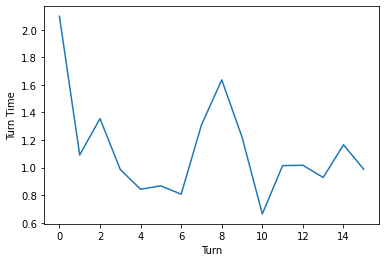

In [13]:
plot.plot(range(16), turn_time13)
plot.xlabel('Turn')
plot.ylabel('Turn Time')
plot.title('')
  
plot.show()

1.3122972697019577
6.779108345508575
1.1242672055959702


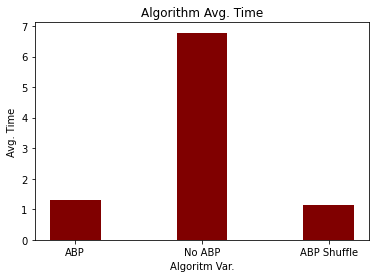

In [18]:
print(mean(turn_time11))
print(mean(turn_time12))
print(mean(turn_time13))

plot.bar(["ABP", "No ABP", "ABP Shuffle"], [mean(turn_time11),mean(turn_time12),mean(turn_time13)], color ='maroon',
        width = 0.4)
 
plot.xlabel("Algoritm Var.")
plot.ylabel("Avg. Time")
plot.title("Algorithm Avg. Time")
plot.show()

## Test 2 Min Max With Depth (ABP)

In [19]:
test_1_min_max = Teeko("MAX", "MIN")
turn_time21 = []

print("Primer Jugador: ", test_1_min_max.current_player)
test_1_min_max.make_a_move((2,2))   #human move
test_1_min_max.switch_player()
print(test_1_min_max.board)
start = time.time()        
print(min_max_with_depth(deepcopy(test_1_min_max)))
end = time.time()
turn_time21.append(end - start)
print(turn_time21, "turn time")

test_1_min_max.make_a_move((1,1)) #computer move
test_1_min_max.switch_player()
print(test_1_min_max.board)

test_1_min_max.make_a_move((1,3)) #human move
test_1_min_max.switch_player()
print(test_1_min_max.board)
start = time.time()        
print(min_max_with_depth(deepcopy(test_1_min_max)))
end = time.time()
turn_time21.append(end - start)
print(turn_time21, "turn time")

test_1_min_max.make_a_move((3,1)) #computer move
test_1_min_max.switch_player()
print(test_1_min_max.board)

test_1_min_max.make_a_move((3,3)) #human move
test_1_min_max.switch_player()
print(test_1_min_max.board)
start = time.time()        
print(min_max_with_depth(deepcopy(test_1_min_max)))
end = time.time()
turn_time21.append(end - start)
print(turn_time21, "turn time")

test_1_min_max.make_a_move((2,1)) #computer move
test_1_min_max.switch_player()
print(test_1_min_max.board)

test_1_min_max.make_a_move((0,1)) #human move
test_1_min_max.switch_player()
print(test_1_min_max.board)
start = time.time()        
print(min_max_with_depth(deepcopy(test_1_min_max)))
end = time.time()
turn_time21.append(end - start)
print(turn_time21, "turn time")

test_1_min_max.make_a_move((4,1)) #computer move --------------------------------COMPUTER WINS-----------------------------------------------------
test_1_min_max.switch_player()
print(test_1_min_max.board)

Primer Jugador:  ('MAX', 1)
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
(None, (1, 1))
[2.647928237915039] turn time
[[0. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0.]
 [0. 2. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
(None, (3, 1))
[2.647928237915039, 2.0195863246917725] turn time
[[0. 0. 0. 0. 0.]
 [0. 2. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 2. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0.]
 [0. 2. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 2. 0. 1. 0.]
 [0. 0. 0. 0. 0.]]
(None, (2, 1))
[2.647928237915039, 2.0195863246917725, 2.195669174194336] turn time
[[0. 0. 0. 0. 0.]
 [0. 2. 0. 1. 0.]
 [0. 2. 1. 0. 0.]
 [0. 2. 0. 1. 0.]
 [0. 0. 0. 0. 0.]]
[[0. 1. 0. 0. 0.]
 [0. 2. 0. 1. 0.]
 [0. 2. 1. 0. 0.]
 [0. 2. 0. 1. 0.]
 [0. 0. 0. 0. 0.]]
(None, (4, 1))
[2.647928237915039, 2.0195863246917725, 2.195669174194336, 1.3403236865997314] turn time
[[0. 1. 0. 0. 0.]
 [0. 2. 0. 1. 0.]
 

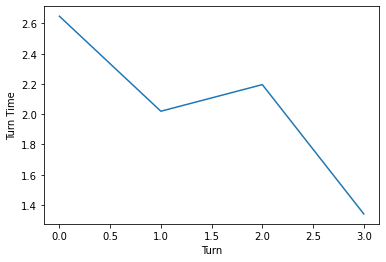

In [20]:

plot.plot(range(len(turn_time21)), turn_time21)
plot.xlabel('Turn')
plot.ylabel('Turn Time')
plot.title('')
  
plot.show()

## Test 2 Min Max With Depth (w/o ABP)

In [22]:
test_1_min_max = Teeko("MAX", "MIN")
turn_time22 = []

print("Primer Jugador: ", test_1_min_max.current_player)
test_1_min_max.make_a_move((2,2))   #human move
test_1_min_max.switch_player()
print(test_1_min_max.board)
start = time.time()        
print(min_max_with_depth_no_ABP(deepcopy(test_1_min_max)))
end = time.time()
turn_time22.append(end - start)
print(turn_time22, "turn time")

test_1_min_max.make_a_move((1,1)) #computer move
test_1_min_max.switch_player()
print(test_1_min_max.board)

test_1_min_max.make_a_move((1,3)) #human move
test_1_min_max.switch_player()
print(test_1_min_max.board)
start = time.time()        
print(min_max_with_depth_no_ABP(deepcopy(test_1_min_max)))
end = time.time()
turn_time22.append(end - start)
print(turn_time22, "turn time")

test_1_min_max.make_a_move((3,1)) #computer move
test_1_min_max.switch_player()
print(test_1_min_max.board)

test_1_min_max.make_a_move((3,3)) #human move
test_1_min_max.switch_player()
print(test_1_min_max.board)
start = time.time()        
print(min_max_with_depth_no_ABP(deepcopy(test_1_min_max)))
end = time.time()
turn_time22.append(end - start)
print(turn_time22, "turn time")

test_1_min_max.make_a_move((2,1)) #computer move
test_1_min_max.switch_player()
print(test_1_min_max.board)

test_1_min_max.make_a_move((0,1)) #human move
test_1_min_max.switch_player()
print(test_1_min_max.board)
start = time.time()        
print(min_max_with_depth_no_ABP(deepcopy(test_1_min_max)))
end = time.time()
turn_time22.append(end - start)
print(turn_time22, "turn time")

test_1_min_max.make_a_move((4,1)) #computer move --------------------------------COMPUTER WINS-----------------------------------------------------
test_1_min_max.switch_player()
print(test_1_min_max.board)

Primer Jugador:  ('MAX', 1)
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
(None, (1, 1))
[16.327096939086914] turn time
[[0. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0.]
 [0. 2. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
(None, (3, 1))
[16.327096939086914, 11.449212551116943] turn time
[[0. 0. 0. 0. 0.]
 [0. 2. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 2. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0.]
 [0. 2. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 2. 0. 1. 0.]
 [0. 0. 0. 0. 0.]]
(None, (2, 1))
[16.327096939086914, 11.449212551116943, 7.946316957473755] turn time
[[0. 0. 0. 0. 0.]
 [0. 2. 0. 1. 0.]
 [0. 2. 1. 0. 0.]
 [0. 2. 0. 1. 0.]
 [0. 0. 0. 0. 0.]]
[[0. 1. 0. 0. 0.]
 [0. 2. 0. 1. 0.]
 [0. 2. 1. 0. 0.]
 [0. 2. 0. 1. 0.]
 [0. 0. 0. 0. 0.]]
(None, (4, 1))
[16.327096939086914, 11.449212551116943, 7.946316957473755, 7.069507598876953] turn time
[[0. 1. 0. 0. 0.]
 [0. 2. 0. 1. 0.

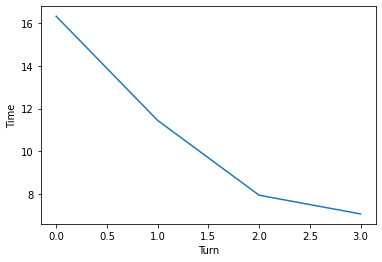

In [23]:

plot.plot(range(len(turn_time22)), turn_time22)
plot.xlabel('Turn')
plot.ylabel('Time')
plot.title('')
  
plot.show()

## Test 2 Min Max With Depth (ABP and Shuffle)

In [24]:
from sklearn.utils import shuffle


test_1_min_max = Teeko("MAX", "MIN")
turn_time23 = []

print("Primer Jugador: ", test_1_min_max.current_player)
test_1_min_max.make_a_move((2,2))   #human move
test_1_min_max.switch_player()
print(test_1_min_max.board)
start = time.time()        
print(min_max_with_depth_shuffle(deepcopy(test_1_min_max)))
end = time.time()
turn_time23.append(end - start)
print(turn_time23, "turn time")

test_1_min_max.make_a_move((1,1)) #computer move
test_1_min_max.switch_player()
print(test_1_min_max.board)

test_1_min_max.make_a_move((1,3)) #human move
test_1_min_max.switch_player()
print(test_1_min_max.board)
start = time.time()        
print(min_max_with_depth_shuffle(deepcopy(test_1_min_max)))
end = time.time()
turn_time23.append(end - start)
print(turn_time23, "turn time")

test_1_min_max.make_a_move((3,1)) #computer move
test_1_min_max.switch_player()
print(test_1_min_max.board)

test_1_min_max.make_a_move((3,3)) #human move
test_1_min_max.switch_player()
print(test_1_min_max.board)
start = time.time()        
print(min_max_with_depth_shuffle(deepcopy(test_1_min_max)))
end = time.time()
turn_time23.append(end - start)
print(turn_time23, "turn time")

test_1_min_max.make_a_move((2,1)) #computer move
test_1_min_max.switch_player()
print(test_1_min_max.board)

test_1_min_max.make_a_move((0,1)) #human move
test_1_min_max.switch_player()
print(test_1_min_max.board)
start = time.time()        
print(min_max_with_depth_shuffle(deepcopy(test_1_min_max)))
end = time.time()
turn_time23.append(end - start)
print(turn_time23, "turn time")

test_1_min_max.make_a_move((4,1)) #computer move --------------------------------COMPUTER WINS-----------------------------------------------------
test_1_min_max.switch_player()
print(test_1_min_max.board)

Primer Jugador:  ('MAX', 1)
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
(None, (3, 3))
[1.4393854141235352] turn time
[[0. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0.]
 [0. 2. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
(None, (3, 1))
[1.4393854141235352, 1.6496193408966064] turn time
[[0. 0. 0. 0. 0.]
 [0. 2. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 2. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0.]
 [0. 2. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 2. 0. 1. 0.]
 [0. 0. 0. 0. 0.]]
(None, (2, 1))
[1.4393854141235352, 1.6496193408966064, 1.6729388236999512] turn time
[[0. 0. 0. 0. 0.]
 [0. 2. 0. 1. 0.]
 [0. 2. 1. 0. 0.]
 [0. 2. 0. 1. 0.]
 [0. 0. 0. 0. 0.]]
[[0. 1. 0. 0. 0.]
 [0. 2. 0. 1. 0.]
 [0. 2. 1. 0. 0.]
 [0. 2. 0. 1. 0.]
 [0. 0. 0. 0. 0.]]
(None, (4, 1))
[1.4393854141235352, 1.6496193408966064, 1.6729388236999512, 1.2631449699401855] turn time
[[0. 1. 0. 0. 0.]
 [0. 2. 0. 1.

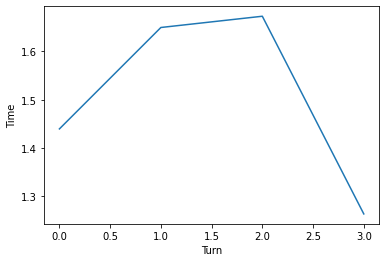

In [25]:
plot.plot(range(len(turn_time23)), turn_time23)
plot.xlabel('Turn')
plot.ylabel('Time')
plot.title('')
  
plot.show()

2.0508768558502197
10.698033511638641
1.5062721371650696


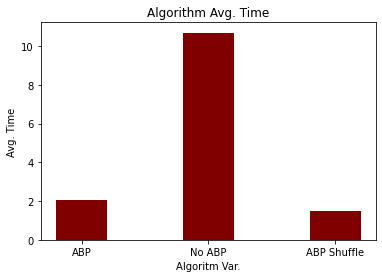

In [26]:
print(mean(turn_time21))
print(mean(turn_time22))
print(mean(turn_time23))

plot.bar(["ABP", "No ABP", "ABP Shuffle"], [mean(turn_time21),mean(turn_time22),mean(turn_time23)], color ='maroon',
        width = 0.4)
 
plot.xlabel("Algoritm Var.")
plot.ylabel("Avg. Time")
plot.title("Algorithm Avg. Time")
plot.show()

## Test 3 Min Max With Depth (ABP)

In [27]:
test_1_min_max = Teeko("MAX", "MIN")
turn_time31 = []

print("Primer Jugador: ", test_1_min_max.current_player)
test_1_min_max.make_a_move((2,2))   #human move
test_1_min_max.switch_player()
print(test_1_min_max.board)
start = time.time()        
print(min_max_with_depth(deepcopy(test_1_min_max)))
end = time.time()
turn_time31.append(end - start)
print(turn_time31, "turn time")

test_1_min_max.make_a_move((1,1)) #computer move
test_1_min_max.switch_player()
print(test_1_min_max.board)

test_1_min_max.make_a_move((2,1)) #human move
test_1_min_max.switch_player()
print(test_1_min_max.board)
start = time.time()        
print(min_max_with_depth(deepcopy(test_1_min_max)))
end = time.time()
turn_time31.append(end - start)
print(turn_time31, "turn time")

test_1_min_max.make_a_move((2,3)) #computer move
test_1_min_max.switch_player()
print(test_1_min_max.board)

test_1_min_max.make_a_move((3,2)) #human move
test_1_min_max.switch_player()
print(test_1_min_max.board)
start = time.time()        
print(min_max_with_depth(deepcopy(test_1_min_max)))
end = time.time()
turn_time31.append(end - start)
print(turn_time31, "turn time")

test_1_min_max.make_a_move((3,1)) #computer move
test_1_min_max.switch_player()
print(test_1_min_max.board)

test_1_min_max.make_a_move((3,3)) #human move
test_1_min_max.switch_player()
print(test_1_min_max.board)
start = time.time()        
print(min_max_with_depth(deepcopy(test_1_min_max)))
end = time.time()
turn_time31.append(end - start)
print(turn_time31, "turn time")

test_1_min_max.make_a_move((1,2)) #computer move 
test_1_min_max.switch_player()
print(test_1_min_max.board)

test_1_min_max.make_a_move((2,1),"l") #human move
test_1_min_max.switch_player()
print(test_1_min_max.board)
start = time.time()        
print(min_max_with_depth(deepcopy(test_1_min_max)))
end = time.time()
turn_time31.append(end - start)
print(turn_time31, "turn time")

test_1_min_max.make_a_move((1,2), "dl") #computer move 
test_1_min_max.switch_player()
print(test_1_min_max.board)

test_1_min_max.make_a_move((2,0),"d") #human move
test_1_min_max.switch_player()
print(test_1_min_max.board)
start = time.time()        
print(min_max_with_depth(deepcopy(test_1_min_max)))
end = time.time()
turn_time31.append(end - start)
print(turn_time31, "turn time")

test_1_min_max.make_a_move((2,3), "ul") #computer move 
test_1_min_max.switch_player()
print(test_1_min_max.board)

test_1_min_max.make_a_move((3,0),"dr") #human move
test_1_min_max.switch_player()
print(test_1_min_max.board)
start = time.time()        
print(min_max_with_depth(deepcopy(test_1_min_max)))
end = time.time()
turn_time31.append(end - start)
print(turn_time31, "turn time")

test_1_min_max.make_a_move((1,2), "ul") #computer move --------------------------------COMPUTER WINS-----------------------------------------------------
test_1_min_max.switch_player()
print(test_1_min_max.board)


Primer Jugador:  ('MAX', 1)
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
(None, (1, 1))
[2.619307279586792] turn time
[[0. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0.]
 [0. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
(None, (2, 3))
[2.619307279586792, 2.4441869258880615] turn time
[[0. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0.]
 [0. 1. 1. 2. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0.]
 [0. 1. 1. 2. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0.]]
(None, (3, 1))
[2.619307279586792, 2.4441869258880615, 1.2455575466156006] turn time
[[0. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0.]
 [0. 1. 1. 2. 0.]
 [0. 2. 1. 0. 0.]
 [0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0.]
 [0. 1. 1. 2. 0.]
 [0. 2. 1. 1. 0.]
 [0. 0. 0. 0. 0.]]
(None, (1, 2))
[2.619307279586792, 2.4441869258880615, 1.2455575466156006, 0.7542116641998291] turn time
[[0. 0. 0. 0. 0.]
 [0. 2. 2. 0. 0.]

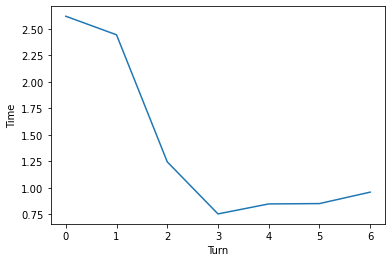

In [28]:

plot.plot(range(len(turn_time31)), turn_time31)
plot.xlabel('Turn')
plot.ylabel('Time')
plot.title('')
  
plot.show()

## Test 3 Min Max With Depth (w/o ABP)

In [29]:
test_1_min_max = Teeko("MAX", "MIN")
turn_time32 = []

print("Primer Jugador: ", test_1_min_max.current_player)
test_1_min_max.make_a_move((2,2))   #human move
test_1_min_max.switch_player()
print(test_1_min_max.board)
start = time.time()        
print(min_max_with_depth_no_ABP(deepcopy(test_1_min_max)))
end = time.time()
turn_time32.append(end - start)
print(turn_time32, "turn time")

test_1_min_max.make_a_move((1,1)) #computer move
test_1_min_max.switch_player()
print(test_1_min_max.board)

test_1_min_max.make_a_move((2,1)) #human move
test_1_min_max.switch_player()
print(test_1_min_max.board)
start = time.time()        
print(min_max_with_depth_no_ABP(deepcopy(test_1_min_max)))
end = time.time()
turn_time32.append(end - start)
print(turn_time32, "turn time")

test_1_min_max.make_a_move((2,3)) #computer move
test_1_min_max.switch_player()
print(test_1_min_max.board)

test_1_min_max.make_a_move((3,2)) #human move
test_1_min_max.switch_player()
print(test_1_min_max.board)
start = time.time()        
print(min_max_with_depth_no_ABP(deepcopy(test_1_min_max)))
end = time.time()
turn_time32.append(end - start)
print(turn_time32, "turn time")

test_1_min_max.make_a_move((3,1)) #computer move
test_1_min_max.switch_player()
print(test_1_min_max.board)

test_1_min_max.make_a_move((3,3)) #human move
test_1_min_max.switch_player()
print(test_1_min_max.board)
start = time.time()        
print(min_max_with_depth_no_ABP(deepcopy(test_1_min_max)))
end = time.time()
turn_time32.append(end - start)
print(turn_time32, "turn time")

test_1_min_max.make_a_move((1,2)) #computer move 
test_1_min_max.switch_player()
print(test_1_min_max.board)

test_1_min_max.make_a_move((2,1),"l") #human move
test_1_min_max.switch_player()
print(test_1_min_max.board)
start = time.time()        
print(min_max_with_depth_no_ABP(deepcopy(test_1_min_max)))
end = time.time()
turn_time32.append(end - start)
print(turn_time32, "turn time")

test_1_min_max.make_a_move((1,2), "dl") #computer move 
test_1_min_max.switch_player()
print(test_1_min_max.board)

test_1_min_max.make_a_move((2,0),"d") #human move
test_1_min_max.switch_player()
print(test_1_min_max.board)
start = time.time()        
print(min_max_with_depth_no_ABP(deepcopy(test_1_min_max)))
end = time.time()
turn_time32.append(end - start)
print(turn_time32, "turn time")

test_1_min_max.make_a_move((2,3), "ul") #computer move 
test_1_min_max.switch_player()
print(test_1_min_max.board)

test_1_min_max.make_a_move((3,0),"dr") #human move
test_1_min_max.switch_player()
print(test_1_min_max.board)
start = time.time()        
print(min_max_with_depth_no_ABP(deepcopy(test_1_min_max)))
end = time.time()
turn_time32.append(end - start)
print(turn_time32, "turn time")

test_1_min_max.make_a_move((1,2), "ul") #computer move --------------------------------COMPUTER WINS-----------------------------------------------------
test_1_min_max.switch_player()
print(test_1_min_max.board)

Primer Jugador:  ('MAX', 1)
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
(None, (1, 1))
[16.284868478775024] turn time
[[0. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0.]
 [0. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
(None, (2, 3))
[16.284868478775024, 11.26137900352478] turn time
[[0. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0.]
 [0. 1. 1. 2. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0.]
 [0. 1. 1. 2. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0.]]
(None, (3, 1))
[16.284868478775024, 11.26137900352478, 6.528284311294556] turn time
[[0. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0.]
 [0. 1. 1. 2. 0.]
 [0. 2. 1. 0. 0.]
 [0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0.]
 [0. 1. 1. 2. 0.]
 [0. 2. 1. 1. 0.]
 [0. 0. 0. 0. 0.]]
(None, (1, 2))
[16.284868478775024, 11.26137900352478, 6.528284311294556, 4.77335786819458] turn time
[[0. 0. 0. 0. 0.]
 [0. 2. 2. 0. 0.]
 [

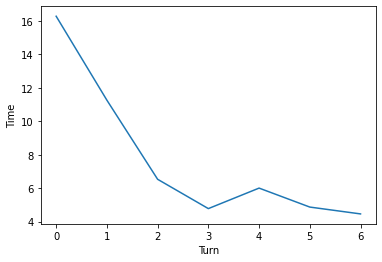

In [30]:
plot.plot(range(len(turn_time32)), turn_time32)
plot.xlabel('Turn')
plot.ylabel('Time')
plot.title('')
  
plot.show()

## Test 3 Min Max With Depth (ABP and Shuffle)

In [31]:
test_1_min_max = Teeko("MAX", "MIN")
turn_time33 = []

print("Primer Jugador: ", test_1_min_max.current_player)
test_1_min_max.make_a_move((2,2))   #human move
test_1_min_max.switch_player()
print(test_1_min_max.board)
start = time.time()        
print(min_max_with_depth_shuffle(deepcopy(test_1_min_max)))
end = time.time()
turn_time33.append(end - start)
print(turn_time33, "turn time")

test_1_min_max.make_a_move((1,1)) #computer move
test_1_min_max.switch_player()
print(test_1_min_max.board)

test_1_min_max.make_a_move((2,1)) #human move
test_1_min_max.switch_player()
print(test_1_min_max.board)
start = time.time()        
print(min_max_with_depth_shuffle(deepcopy(test_1_min_max)))
end = time.time()
turn_time33.append(end - start)
print(turn_time33, "turn time")

test_1_min_max.make_a_move((2,3)) #computer move
test_1_min_max.switch_player()
print(test_1_min_max.board)

test_1_min_max.make_a_move((3,2)) #human move
test_1_min_max.switch_player()
print(test_1_min_max.board)
start = time.time()        
print(min_max_with_depth_shuffle(deepcopy(test_1_min_max)))
end = time.time()
turn_time33.append(end - start)
print(turn_time33, "turn time")

test_1_min_max.make_a_move((3,1)) #computer move
test_1_min_max.switch_player()
print(test_1_min_max.board)

test_1_min_max.make_a_move((3,3)) #human move
test_1_min_max.switch_player()
print(test_1_min_max.board)
start = time.time()        
print(min_max_with_depth_shuffle(deepcopy(test_1_min_max)))
end = time.time()
turn_time33.append(end - start)
print(turn_time33, "turn time")

test_1_min_max.make_a_move((1,2)) #computer move 
test_1_min_max.switch_player()
print(test_1_min_max.board)

test_1_min_max.make_a_move((2,1),"l") #human move
test_1_min_max.switch_player()
print(test_1_min_max.board)
start = time.time()        
print(min_max_with_depth_shuffle(deepcopy(test_1_min_max)))
end = time.time()
turn_time33.append(end - start)
print(turn_time33, "turn time")

test_1_min_max.make_a_move((1,2), "dl") #computer move 
test_1_min_max.switch_player()
print(test_1_min_max.board)

test_1_min_max.make_a_move((2,0),"d") #human move
test_1_min_max.switch_player()
print(test_1_min_max.board)
start = time.time()        
print(min_max_with_depth_shuffle(deepcopy(test_1_min_max)))
end = time.time()
turn_time33.append(end - start)
print(turn_time33, "turn time")

test_1_min_max.make_a_move((2,3), "ul") #computer move 
test_1_min_max.switch_player()
print(test_1_min_max.board)

test_1_min_max.make_a_move((3,0),"dr") #human move
test_1_min_max.switch_player()
print(test_1_min_max.board)
start = time.time()        
print(min_max_with_depth_shuffle(deepcopy(test_1_min_max)))
end = time.time()
turn_time33.append(end - start)
print(turn_time33, "turn time")

test_1_min_max.make_a_move((1,2), "ul") #computer move --------------------------------COMPUTER WINS-----------------------------------------------------
test_1_min_max.switch_player()
print(test_1_min_max.board)


Primer Jugador:  ('MAX', 1)
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
(None, (1, 2))
[1.3588488101959229] turn time
[[0. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0.]
 [0. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
(None, (2, 3))
[1.3588488101959229, 1.5362422466278076] turn time
[[0. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0.]
 [0. 1. 1. 2. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0.]
 [0. 1. 1. 2. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0.]]
(None, (3, 1))
[1.3588488101959229, 1.5362422466278076, 0.964693546295166] turn time
[[0. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0.]
 [0. 1. 1. 2. 0.]
 [0. 2. 1. 0. 0.]
 [0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0.]
 [0. 1. 1. 2. 0.]
 [0. 2. 1. 1. 0.]
 [0. 0. 0. 0. 0.]]
(None, (1, 2))
[1.3588488101959229, 1.5362422466278076, 0.964693546295166, 0.964693546295166] turn time
[[0. 0. 0. 0. 0.]
 [0. 2. 2. 0. 0.

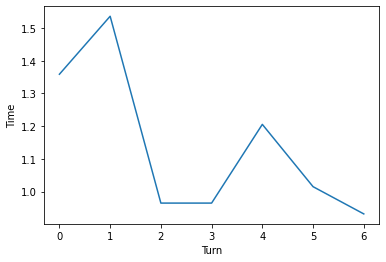

In [32]:
plot.plot(range(len(turn_time33)), turn_time33)
plot.xlabel('Turn')
plot.ylabel('Time')
plot.title('')
  
plot.show()

1.3890068871634347
7.73854398727417
1.139488935470581


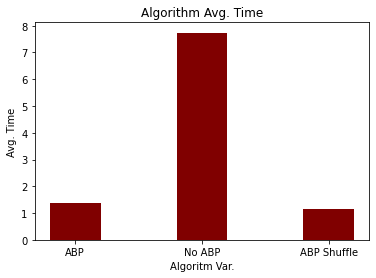

In [33]:
print(mean(turn_time31))
print(mean(turn_time32))
print(mean(turn_time33))

plot.bar(["ABP", "No ABP", "ABP Shuffle"], [mean(turn_time31),mean(turn_time32),mean(turn_time33)], color ='maroon',
        width = 0.4)
 
plot.xlabel("Algoritm Var.")
plot.ylabel("Avg. Time")
plot.title("Algorithm Avg. Time")
plot.show()

In [54]:
test_1_min_max = Teeko("MAX", "MIN")

test_1_min_max.make_a_move((2,2))   #human move
test_1_min_max.switch_player()       
a,b,states_1 = min_max_with_depth(deepcopy(test_1_min_max))
a,b,states_2 = min_max_with_depth_no_ABP(deepcopy(test_1_min_max))
a,b,states_3 = min_max_with_depth_shuffle(deepcopy(test_1_min_max))


42830
267744
22701


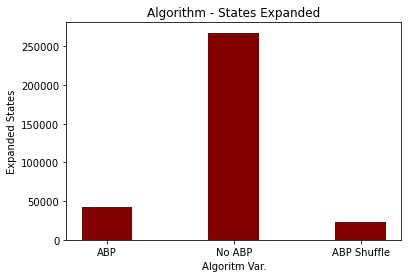

In [55]:
print(states_1)
print(states_2)
print(states_3)


plot.bar(["ABP", "No ABP", "ABP Shuffle"], [states_1,states_2,states_3], color ='maroon',
        width = 0.4)
 
plot.xlabel("Algoritm Var.")
plot.ylabel("Expanded States")
plot.title("Algorithm - States Expanded")
plot.show()

In [56]:
gameTest2 = Teeko("MAX", "MIN")

gameTest2.make_a_move((4,2))
gameTest2.switch_player()

gameTest2.make_a_move((1,0))
gameTest2.switch_player()

gameTest2.make_a_move((3,3))
gameTest2.switch_player()

gameTest2.make_a_move((1,4))
gameTest2.switch_player()

gameTest2.make_a_move((2,3))
gameTest2.switch_player()

gameTest2.make_a_move((4,0))
gameTest2.switch_player()

gameTest2.make_a_move((2,1))
gameTest2.switch_player()

gameTest2.make_a_move((1,2))
gameTest2.switch_player()

gameTest2.make_a_move((4,2),"u")
gameTest2.switch_player()


a,b,states_11 = min_max_with_depth(deepcopy(gameTest2))
a,b,states_21 = min_max_with_depth_no_ABP(deepcopy(gameTest2))
a,b,states_31 = min_max_with_depth_shuffle(deepcopy(gameTest2))

11405
116469
15503


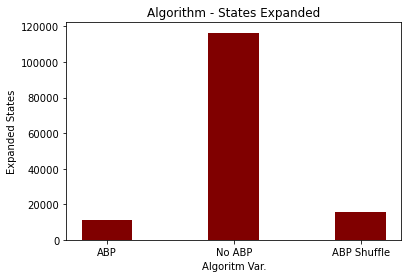

In [57]:
print(states_11)
print(states_21)
print(states_31)


plot.bar(["ABP", "No ABP", "ABP Shuffle"], [states_11,states_21,states_31], color ='maroon',
        width = 0.4)
 
plot.xlabel("Algoritm Var.")
plot.ylabel("Expanded States")
plot.title("Algorithm - States Expanded")
plot.show()